In [1]:
import array
import random
import numpy
import matplotlib.pyplot as plt

In [2]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 3.1 MB/s eta 0:00:00


In [3]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

In [4]:
IND_SIZE = 10
MIN_VALUE = -1
MAX_VALUE = 1
MIN_STRATEGY = -1
MAX_STRATEGY = 1

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

In [6]:
# Individual generator
def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

In [7]:
def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

In [8]:
import numpy as np
def sumPowell(x):
  sumY = 0
  for index, xValue in enumerate(x, 1):    
    absX = np.absolute(xValue) 
    powerX = np.power(xValue, index + 1)
    sumY += powerX   
  return (sumY,)
  #return (sum(x),)

In [9]:
toolbox = base.Toolbox()
toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxUniform, indpb=0.3)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", sumPowell)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

gen	nevals	avg     	std   	min      	max    
0  	30    	0.719326	0.6501	-0.745213	2.45796
1  	185   	0.2045  	0.622691	-1.12238 	1.43654
2  	182   	-0.396671	0.584143	-1.65966 	0.456788
3  	180   	-0.876283	0.466647	-1.99582 	0.203524
4  	182   	-1.30814 	0.403738	-2.17119 	-0.478827
5  	175   	-5.36281 	13.0272 	-54.0831 	-1.11986 
6  	184   	-13.9585 	21.2003 	-54.2914 	-1.23843 
7  	184   	-29.3536 	24.8937 	-54.5576 	-2.2465  
8  	180   	-50.515  	12.8979 	-57.2105 	-2.46618 
9  	184   	-57.6549 	10.0971 	-93.8071 	-53.6185 
10 	178   	-66.0131 	17.5366 	-110.453 	-54.1609 
11 	187   	-83.955  	21.1657 	-110.457 	-54.5607 
12 	182   	-102.355 	8.02719 	-110.488 	-93.6716 
13 	175   	-108.572 	4.94682 	-110.488 	-94.0702 
14 	180   	-110.452 	0.0775188	-110.488 	-110.041 
15 	177   	-110.481 	0.0112368	-110.488 	-110.456 
16 	183   	-390.762 	1509.32  	-8518.71 	-110.484 
17 	170   	-679.938 	2095.26  	-8518.71 	-110.486 
18 	178   	-3722.32 	4110.38  	-8518.75 	-110.488 
19 	191   

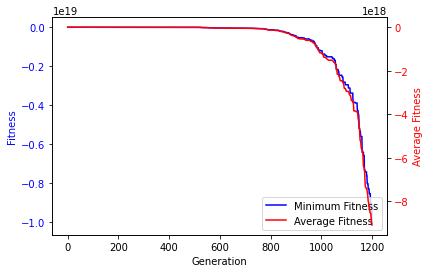

Best individual is Individual('d', [1.1825706052161644, -452.62573623144635, 2.655666754617001, -84.71536846848144, 0.3818785132775302, -3.6663244941884257, 0.9267253567176137, -130.05587980682586, -1.3232050086657399, 0.36537751749857256]), fitness: (-1.0645594572649177e+19,)
gen	nevals	avg     	std     	min      	max    
0  	30    	0.960361	0.752961	-0.663035	2.98042
1  	181   	0.389649	0.490267	-0.663035	1.07101
2  	182   	-0.00501683	0.350279	-0.663035	0.647311
3  	184   	-0.329203  	0.233377	-0.819317	0.231032
4  	183   	-0.538589  	0.16479 	-0.981736	-0.36653
5  	177   	-0.692712  	0.173625	-1.01065 	-0.395142
6  	181   	-0.947717  	0.15419 	-1.39908 	-0.65301 
7  	185   	-1.13977   	0.213913	-1.58902 	-0.782346
8  	188   	-1.41175   	0.240748	-2.23047 	-0.989863
9  	180   	-1.62779   	0.286839	-2.50606 	-1.31523 
10 	172   	-10.0527   	42.1661 	-236.982 	-1.40277 
11 	178   	-21.4378   	65.4604 	-292.168 	-1.61322 
12 	187   	-48.7222   	94.8064 	-292.636 	-2.18639 
13 	180   	-

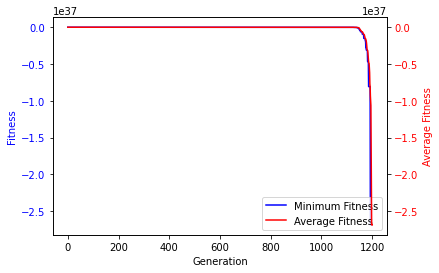

Best individual is Individual('d', [-8.579794274263165, -0.5344108887051559, 0.7447839964916994, -4.233164978629457, 4.975929173258801, -232347.42810708762, 4.549266691977253, -2.5866975905635194, 1.783394983450397, -41.95362443831785]), fitness: (-3.6556540252072777e+37,)
gen	nevals	avg     	std     	min     	max    
0  	30    	0.827878	0.879279	-1.54376	2.86038
1  	182   	0.140839	0.703282	-1.69095	0.976679
2  	186   	-0.16015	0.616104	-1.69095	0.547304
3  	177   	-0.775115	0.609143	-1.70431	0.443473
4  	179   	-1.17882 	0.403224	-1.71356	-0.384084
5  	174   	-1.55648 	0.294054	-2.05652	-0.990541
6  	181   	-1.94258 	0.383357	-3.15726	-1.37102 
7  	182   	-2.31111 	0.518804	-3.53848	-1.68616 
8  	185   	-2.70496 	0.568453	-3.53848	-1.83537 
9  	182   	-3.22366 	0.532963	-4.23697	-2.01317 
10 	177   	-4.6727  	5.36899 	-33.517 	-2.60307 
11 	177   	-6.02945 	7.55034 	-34.9675	-2.60307 
12 	183   	-9.65268 	11.2412 	-34.9675	-3.94246 
13 	174   	-42.7339 	80.8519 	-331.706	-4.11727 
14

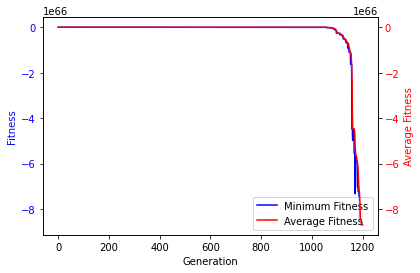

Best individual is Individual('d', [0.3733732705596945, -49.76237362584319, -0.10377943052227902, -37.92102954476686, -4.433403104924682, -0.5977364980040747, -0.2352442041352759, -31.31688588139494, -1.349467353798382, -1246952.0686421318]), fitness: (-1.1333064497477709e+67,)
gen	nevals	avg     	std     	min      	max    
0  	30    	0.982859	0.769877	-0.300344	2.38032
1  	179   	0.370598	0.435164	-0.622953	1.36849
2  	184   	0.00215276	0.367773	-1.32119 	0.583888
3  	179   	-0.34879  	0.361299	-1.32614 	0.0872281
4  	181   	-0.710693 	0.399273	-1.53574 	-0.137393
5  	183   	-1.10727  	0.317513	-1.60214 	-0.482466
6  	186   	-1.54249  	0.282241	-2.28969 	-0.99101 
7  	176   	-1.69069  	0.24725 	-2.23633 	-1.27186 
8  	182   	-1.94536  	0.265569	-2.39766 	-1.5915  
9  	173   	-2.29413  	0.473133	-3.78579 	-1.60364 
10 	179   	-2.88467  	0.55814 	-3.78579 	-2.23822 
11 	180   	-3.33955  	0.497525	-3.97947 	-2.37683 
12 	183   	-3.72221  	0.332803	-4.95855 	-2.76676 
13 	182   	-3.96671 

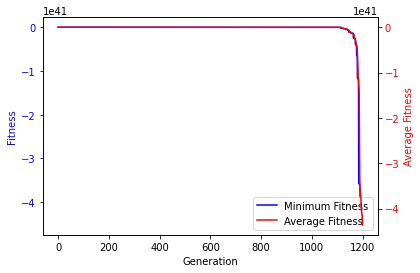

Best individual is Individual('d', [15.300496391310032, -12.423874431337651, 10.751834976282327, -263.9352011343429, -0.9050694957633686, -3.3032194357132103, 3.4494387899286845, -44988.13644884298, -0.15917538865988023, -279.73974396741426]), fitness: (-7.548871508117134e+41,)
gen	nevals	avg     	std     	min      	max    
0  	30    	0.664944	0.847394	-0.597797	2.68278
1  	174   	-0.0852196	0.533838	-0.79616 	1.24532
2  	183   	-0.571835 	0.416571	-1.40604 	0.311528
3  	182   	-1.30551  	1.60641 	-9.71576 	-0.306891
4  	172   	-2.57065  	4.50903 	-24.5987 	-0.565511
5  	180   	-4.87975  	6.8935  	-24.6447 	-1.29547 
6  	180   	-6.63924  	8.2912  	-24.6447 	-1.37937 
7  	181   	-11.3389  	11.5705 	-48.81   	-1.99884 
8  	184   	-24.0163  	14.7462 	-49.5826 	-2.20972 
9  	174   	-37.742   	15.4995 	-66.1204 	-7.89944 
10 	173   	-56.0023  	13.6584 	-66.752  	-25.3714 
11 	183   	-66.4051  	0.405618	-67.1384 	-65.824  
12 	186   	-66.705   	0.317237	-67.1385 	-66.0319 
13 	175   	-68.511

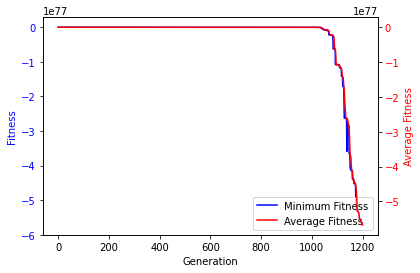

Best individual is Individual('d', [0.16499407669949398, -6.971580890010669, -2.4484863026406294, -1.7818726362556094, 3.9385583891527665, 0.4646946645091895, -8.334383303641424, -15.818992428928084, -4.998405794294333, -12522437.876341552]), fitness: (-1.1873472322084846e+78,)


In [11]:
def main():
    random.seed()
    MU, LAMBDA = 30, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=1200, stats=stats, halloffame=hof, verbose=True)

    gen, fit_mins, size_avgs  = logbook.select("gen", "min", "avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
      tl.set_color("b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
    ax2.set_ylabel("Average Fitness", color="r")
    for tl in ax2.get_yticklabels():
      tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="lower right", frameon=True)

    plt.show()    
    
    print("Best individual is %s, fitness: %s" % (hof[0], hof[0].fitness.values))

    #plt.figure(1, figsize=(7, 4))
    #plt.plot(logbook.select('avg'), 'b-', label='Avg. fitness')
    #plt.fill_between(range(len(logbook)), logbook.select('max'), logbook.select('min'), facecolor='blue', alpha=0.47)
    #plt.plot(logbook.select('std'), 'm--', label='Std. deviation')
    #plt.legend(frameon=True)
    #plt.ylabel('Fitness'); plt.xlabel('Iterations');



    return pop, logbook, hof
    
if __name__ == "__main__":
    for i in range(5):
       main()